## Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
from common import *

#plt.style.use('thesis.mplstyle')

In [3]:
thousandsGroupingFormatter =  mpl.ticker.FuncFormatter(lambda x, p: '$'+format(int(x), ',').replace(',', '\,')+'$')

In [4]:
from pandas import Series


def otherSeries(seriesToBeOthered:Series, valuesToKeep:int):
    seriesToBeOthered_value_counts = seriesToBeOthered.value_counts()
    min_val = seriesToBeOthered_value_counts[valuesToKeep]
    keep_vals = seriesToBeOthered_value_counts[seriesToBeOthered_value_counts>min_val]
    otheredSeries = seriesToBeOthered.copy()
    otheredSeries[~(otheredSeries.isin(keep_vals.index))] = 'other'
    return otheredSeries

## Load and Combine Data

In [5]:
results = pd.read_json('crawl_results_filter/results.json').astype({'hasBanner':'bool'})

# path = r'crawl_results_filter'
# pattern = r'results.json_*'
# all_files = glob.glob(os.path.join(path ,pattern))
# li = []
# for filename in all_files:
#     df = pd.read_json(filename).astype({'hasBanner':'bool'})
#     li.append(df)
# results = pd.concat(li, axis=0, ignore_index=True)

results

,pageUrl,usedUrl,fullUrl,hasBanner,cmp,error
0,google.com,https://google.com,https://www.google.com/,True,google_popup,NaN
1,gtld-servers.net,NaN,NaN,True,NaN,Could not reach Url with any alternative. Erro...
2,akamaiedge.net,NaN,NaN,True,NaN,Could not reach Url with any alternative. Erro...
3,facebook.com,https://facebook.com,https://www.facebook.com/,True,Facebook,NaN
4,netflix.com,https://netflix.com,https://www.netflix.com/de-en/,True,onetrust_pctab,NaN
...,...,...,...,...,...,...
99995,chartmogul.com,https://chartmogul.com,https://chartmogul.com/,False,NaN,NaN
99996,sfmlab.com,https://sfmlab.com,https://sfmlab.com/,False,NaN,NaN
99997,shou.edu.cn,https://www.shou.edu.cn,https://www.shou.edu.cn/,False,NaN,NaN
99998,bart.nl,http://www.bart.nl,http://www.iae.nl/,False,NaN,NaN


In [6]:
tranco = pd.read_csv('tranco_top-1m_N7QVW_2022-10-07.csv',names=['pagerank','domain'])
tranco

,pagerank,domain
0,1,google.com
1,2,gtld-servers.net
2,3,youtube.com
3,4,facebook.com
4,5,microsoft.com
...,...,...
999995,999996,migrationinstitute.fi
999996,999997,cobourg.ca
999997,999998,dtyxjd.com
999998,999999,uitv.com.cn


In [7]:
results = results.merge(tranco,how='left',left_on='pageUrl',right_on='domain').drop(columns='domain')
results

,pageUrl,usedUrl,fullUrl,hasBanner,cmp,error,pagerank
0,google.com,https://google.com,https://www.google.com/,True,google_popup,NaN,1
1,gtld-servers.net,NaN,NaN,True,NaN,Could not reach Url with any alternative. Erro...,2
2,akamaiedge.net,NaN,NaN,True,NaN,Could not reach Url with any alternative. Erro...,6
3,facebook.com,https://facebook.com,https://www.facebook.com/,True,Facebook,NaN,4
4,netflix.com,https://netflix.com,https://www.netflix.com/de-en/,True,onetrust_pctab,NaN,7
...,...,...,...,...,...,...,...
99995,chartmogul.com,https://chartmogul.com,https://chartmogul.com/,False,NaN,NaN,99997
99996,sfmlab.com,https://sfmlab.com,https://sfmlab.com/,False,NaN,NaN,100000
99997,shou.edu.cn,https://www.shou.edu.cn,https://www.shou.edu.cn/,False,NaN,NaN,99984
99998,bart.nl,http://www.bart.nl,http://www.iae.nl/,False,NaN,NaN,99988


In [8]:
results[results.pageUrl=='carrefour.es']

,pageUrl,usedUrl,fullUrl,hasBanner,cmp,error,pagerank
19584,carrefour.es,https://carrefour.es,https://www.carrefour.es/,True,onetrust_banner,NaN,19586


## Find missing Websites

In [9]:
missing = tranco[~(tranco.domain.isin(results.pageUrl))]
missing

,pagerank,domain
100000,100001,unt.se
100001,100002,usheethe.com
100002,100003,coach.me
100003,100004,sdzwildlifeexplorers.org
100004,100005,epaenlinea.com
...,...,...
999995,999996,migrationinstitute.fi
999996,999997,cobourg.ca
999997,999998,dtyxjd.com
999998,999999,uitv.com.cn


In [10]:
# count missing domains
missing.shape[0]

900000

## Sites with Strange Redirects

In [11]:
# results.dtypes

In [12]:
# results.loc[~(results.fullUrl.isna()),'urlMatch'] = results[~(results.fullUrl.isna())].apply(func = (lambda r: (r.pageUrl in r.fullUrl)  ), axis='columns')
# results.loc[results.urlMatch == False,['pagerank','pageUrl','usedUrl','fullUrl']]

In [13]:
# results.loc[((results.urlMatch == False) & (results.fullUrl.str.len()>500)),['pagerank','pageUrl','usedUrl','fullUrl']]

## Create URL-List for Fingerprinting Detection Crawl

In [14]:
results.loc[(~(results.fullUrl.isna())) & (results.hasBanner),'pageUrl'].to_csv('tranco_top-100k_N7QVW_2022-10-07_with_cmp',index=False,header=False)

## Process findings

In [16]:
results['reached'] = ~(results.fullUrl.isna())

results['status'] = None
results.loc[~(results.reached),'status'] = 'not reached'
results.loc[(results.reached)&(results.hasBanner),'status'] = 'compatible CMP detected'
results.loc[(results.reached)&(~(results.hasBanner)),'status'] = 'no CMP detected'


results['cmp_simplified'] = results.cmp
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('trustarc')),'cmp_simplified'] = 'trustarc'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('onetrust')),'cmp_simplified'] = 'onetrust'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('sourcepoint')),'cmp_simplified'] = 'sourcepoint'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('yahoo')),'cmp_simplified'] = 'yahoo'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('Evidon')),'cmp_simplified'] = 'Evidon'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('cookieinformation')),'cmp_simplified'] = 'cookieinformation'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('quantcast')),'cmp_simplified'] = 'quantcast'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('paypal')),'cmp_simplified'] = 'paypal'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('cookieinformation')),'cmp_simplified'] = 'cookieinformation'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('google')),'cmp_simplified'] = 'google'
results.loc[(~(results.cmp.isna())) & (results.cmp.str.startswith('bbc_fc')),'cmp_simplified'] = 'funding choices'

cmp_simplified_value_counts = results.cmp_simplified.value_counts()
min_cmp = cmp_simplified_value_counts[7]
keep_cmps = cmp_simplified_value_counts[cmp_simplified_value_counts>min_cmp]
results['cmp_simplified_othered'] = results.cmp_simplified
results.loc[(~(results.cmp_simplified.isna())) & ~(results.cmp_simplified.isin(keep_cmps.index)),'cmp_simplified_othered'] = 'other'

results['tld']=results.pageUrl.str.split('.').str[-1]
results['tld_othered']=otherSeries(results.tld,14)

results


,pageUrl,usedUrl,fullUrl,hasBanner,cmp,error,pagerank,reached,status,cmp_simplified,cmp_simplified_othered,tld,tld_othered
0,google.com,https://google.com,https://www.google.com/,True,google_popup,NaN,1,True,compatible CMP detected,google,google,com,com
1,gtld-servers.net,NaN,NaN,True,NaN,Could not reach Url with any alternative. Erro...,2,False,not reached,NaN,NaN,net,net
2,akamaiedge.net,NaN,NaN,True,NaN,Could not reach Url with any alternative. Erro...,6,False,not reached,NaN,NaN,net,net
3,facebook.com,https://facebook.com,https://www.facebook.com/,True,Facebook,NaN,4,True,compatible CMP detected,Facebook,other,com,com
4,netflix.com,https://netflix.com,https://www.netflix.com/de-en/,True,onetrust_pctab,NaN,7,True,compatible CMP detected,onetrust,onetrust,com,com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,chartmogul.com,https://chartmogul.com,https://chartmogul.com/,False,NaN,NaN,99997,True,no CMP detected,NaN,NaN,com,com
99996,sfmlab.com,https://sfmlab.com,https://sfmlab.com/,False,NaN,NaN,100000,True,no CMP detected,NaN,NaN,com,com
99997,shou.edu.cn,https://www.shou.edu.cn,https://www.shou.edu.cn/,False,NaN,NaN,99984,True,no CMP detected,NaN,NaN,cn,cn
99998,bart.nl,http://www.bart.nl,http://www.iae.nl/,False,NaN,NaN,99988,True,no CMP detected,NaN,NaN,nl,other


# Create Status List for Detection Analysis

In [17]:
results[['pageUrl','status']].rename(columns={'pageUrl':'domain'}).to_csv('filterCrawlStatusReport.csv',index=False,header=True)

# Access Scheme Analysis

In [18]:

def getAccessScheme(resultRow: pd.Series):
    if resultRow.reached == False:
        return 'unreachable'
    else:
        return resultRow.usedUrl[0:len(resultRow.usedUrl)-len(resultRow.pageUrl)]

results['accessScheme'] = results.apply(getAccessScheme,axis=1)
results.accessScheme.value_counts()

https://        72377
unreachable     13310
http://          9637
https://www.     3150
http://www.      1526
Name: accessScheme, dtype: int64

# Fix Wrong Status Tagging

In [19]:
wronglyTaggedDomains = results.loc[(results.status=='compatible CMP detected') & (results.cmp.isna()),'pageUrl']
wronglyTaggedDomains.to_csv('filterCrawlWronglyTaggedAsWithCmp.csv',index=False,header=True)
print(f'Number of domains wrongly tagged as [with CMP]:    {wronglyTaggedDomains.shape[0]}')
withCmpCountBefore = results.loc[(results.status=='compatible CMP detected')].shape[0]
print(f'Number of domains tagged as [with CMP] before fix: {withCmpCountBefore}')
results.loc[(results.status=='compatible CMP detected') & (results.cmp.isna()),'status'] = 'no CMP detected'
withCmpCountAfter = results.loc[(results.status=='compatible CMP detected')].shape[0]
print(f'Number of domains tagged as [with CMP] after fix: {withCmpCountAfter}')

Number of domains wrongly tagged as [with CMP]:    2710
Number of domains tagged as [with CMP] before fix: 11957
Number of domains tagged as [with CMP] after fix: 9247


# Analyze Findings

### Status Overview

In [20]:
results.groupby('cmp_simplified').pageUrl.agg(lambda x: ','.join(x[0:10]))

cmp_simplified
Autodesk               instructables.com,plangrid.com,autodesk360.com...
Evidon                 dropbox.com,playstation.com,ge.com,fujitsu.com...
Facebook               facebook.com,fbcdn.net,fb.com,fb.me,messenger....
Fanatical                                                  fanatical.com
SFR                                         sfr.fr,neuf.fr,red-by-sfr.fr
Sirdata                dafont.com,joemonster.org,forocoches.com,alete...
Truendo                formstack.com,sportradar.com,sportradarserving...
Twitter                twitter.com,sv.com,isna.ir,malc.org.uk,twiter....
Volkswagen                                       vw.com,volkswagen.co.uk
Webedia                elcomercio.pe,ultimateclassicrock.com,mangahas...
begadi.com             delta.com,managewp.com,ku.edu.tr,bequiet.com,a...
consentmanager.net     mail.ru,sourceforge.net,slashdot.org,funkedigi...
cookieLab                                         christianlouboutin.com
cookiebar              smartadserver

NameError: name 'saveFigure' is not defined

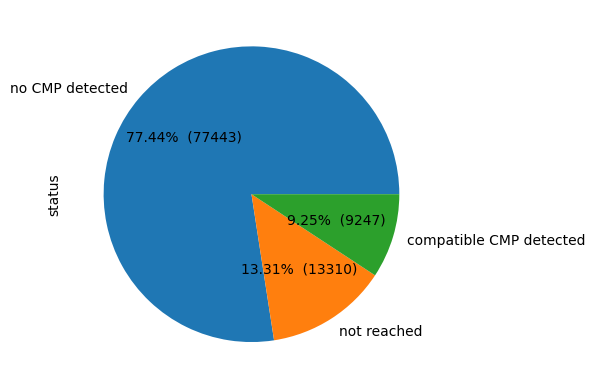

In [21]:
status_counts = results.status.value_counts()
fig, ax = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

status_counts.plot(
    kind='pie',
    ax = ax,
    autopct=make_autopct(status_counts)
)
saveFigure(fig,'filter_scan_status')
plt.show()

### Frequent CMPs

NameError: name 'saveFigure' is not defined

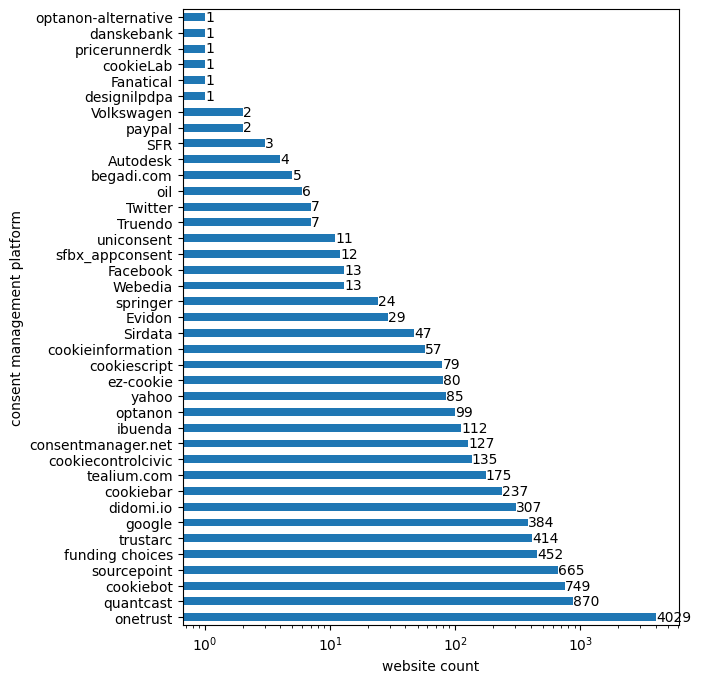

In [22]:
cmp_counts = results.loc[results.hasBanner,'cmp_simplified'].value_counts()
fig, ax = plt.subplots()
fig.set_figheight(8)
cmp_counts.plot(
    kind='barh',
    ax=ax,
    logx=True
)
ax.bar_label(ax.containers[0])

ax.set_xlabel('website count')
ax.set_ylabel('consent management platform')

saveFigure(fig,'filter_scan_cmps')
plt.show()

### Frequent TLDs

NameError: name 'saveFigure' is not defined

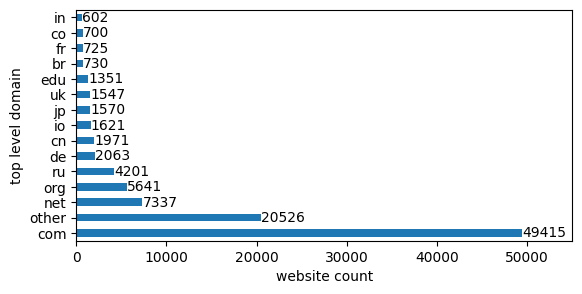

In [23]:
tld_counts = results.tld_othered.value_counts()
fig, ax = plt.subplots()
fig.set_figheight(3)
tld_counts.plot(
    kind='barh',
    ax=ax
)
ax.bar_label(ax.containers[0])

ax.set_xlabel('website count')
ax.set_ylabel('top level domain')

ax.set_xlim(0,55000)

saveFigure(fig,'filter_scan_tlds')
plt.show()

In [29]:
results.cmp_simplified_othered.value_counts() / results[~(results.cmp_simplified_othered.isna())].shape[0]

onetrust           0.435709
other              0.182113
quantcast          0.094085
cookiebot          0.080999
sourcepoint        0.071915
funding choices    0.048881
trustarc           0.044771
google             0.041527
Name: cmp_simplified_othered, dtype: float64